# Challenge 2 - TELECOMX

##EXTRACCION DE DATOS

###Incoherencias de los datos - Manejo de Inconsistencias

In [4]:
import requests
import pandas as pd

RAW_URL = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

resp = requests.get(RAW_URL, timeout=30)
resp.raise_for_status()

payload = resp.json()

if isinstance(payload, list):
    df = pd.json_normalize(payload)

elif isinstance(payload, dict):
    if "data" in payload and isinstance(payload["data"], list):
        df = pd.json_normalize(payload["data"])
    else:
        df = pd.json_normalize(payload)

else:
    raise ValueError("Formato JSON no reconocido (ni lista ni dict).")

print("Columnas:", df.columns.tolist())
print("Filas x Columnas:", df.shape)
df.head()

Columnas: ['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen', 'customer.Partner', 'customer.Dependents', 'customer.tenure', 'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService', 'internet.OnlineSecurity', 'internet.OnlineBackup', 'internet.DeviceProtection', 'internet.TechSupport', 'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract', 'account.PaperlessBilling', 'account.PaymentMethod', 'account.Charges.Monthly', 'account.Charges.Total']
Filas x Columnas: (7267, 21)


customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... internet.OnlineBackup  \
0                      DSL  ...                   Yes   
1                      DSL  ...                    No   
2              Fiber optic  ...                    No   
3              Fiber optic  ...                   Yes   
4              Fiber optic  ...                    No   

  internet.DeviceProtection internet.TechSupport internet.StreamingTV  \
0                        No                  Yes                  Yes   
1                        No                   No                   No   
2                       Yes                   No                   No   
3                       Yes                   No                  Yes   
4                        No                  Yes                  Yes   

  internet.StreamingMovies account.Contract account.PaperlessBilling  \
0                       No         One year                      Yes   
1                      Yes   Month-to-month                       No   
2                       No   Month-to-month                      Yes   
3                      Yes   Month-to-month                      Yes   
4                       No   Month-to-month                      Yes   

  account.PaymentMethod account.Charges.Monthly  account.Charges.Total  
0          Mailed check                    65.6                  593.3  
1          Mailed check                    59.9                  542.4  
2      Electronic check                    73.9                 280.85  
3      Electronic check                    98.0                1237.85  
4          Mailed check                    83.9                  267.4  

[5 rows x 21 columns]

## Transformaci√≥n

###Cuentas Diarias

In [6]:
df['Cuentas_Diarias'] = df['account.Charges.Monthly'] / 30

print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen customer.Partner  \
0  0002-ORFBO    No          Female                       0              Yes   
1  0003-MKNFE    No            Male                       0               No   
2  0004-TLHLJ   Yes            Male                       0               No   
3  0011-IGKFF   Yes            Male                       1              Yes   
4  0013-EXCHZ   Yes          Female                       1              Yes   

  customer.Dependents  customer.tenure phone.PhoneService phone.MultipleLines  \
0                 Yes                9                Yes                  No   
1                  No                9                Yes                 Yes   
2                  No                4                Yes                  No   
3                  No               13                Yes                  No   
4                  No                3                Yes                  No   

  internet.InternetService  ... 

### Yes - 1 & No -0

In [7]:
df = df.replace({'Yes': 1, 'No': 0})

print(df.head())

   customerID Churn customer.gender  customer.SeniorCitizen  customer.Partner  \
0  0002-ORFBO     0          Female                       0                 1   
1  0003-MKNFE     0            Male                       0                 0   
2  0004-TLHLJ     1            Male                       0                 0   
3  0011-IGKFF     1            Male                       1                 1   
4  0013-EXCHZ     1          Female                       1                 1   

   customer.Dependents  customer.tenure  phone.PhoneService  \
0                    1                9                   1   
1                    0                9                   1   
2                    0                4                   1   
3                    0               13                   1   
4                    0                3                   1   

  phone.MultipleLines internet.InternetService  ... internet.DeviceProtection  \
0                   0                      DSL  ...  

/tmp/ipython-input-2579048428.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Yes': 1, 'No': 0})


## Carga y Analisis

### Analisis Descriptivo

In [8]:
df.describe()

customer.SeniorCitizen  customer.Partner  customer.Dependents  \
count             7267.000000       7267.000000          7267.000000   
mean                 0.162653          0.484106             0.300124   
std                  0.369074          0.499782             0.458343   
min                  0.000000          0.000000             0.000000   
25%                  0.000000          0.000000             0.000000   
50%                  0.000000          0.000000             0.000000   
75%                  0.000000          1.000000             1.000000   
max                  1.000000          1.000000             1.000000   

       customer.tenure  phone.PhoneService  account.PaperlessBilling  \
count      7267.000000         7267.000000               7267.000000   
mean         32.346498            0.902711                  0.593230   
std          24.571773            0.296371                  0.491265   
min           0.000000            0.000000                  0.000000   
25%           9.000000            1.000000                  0.000000   
50%          29.000000            1.000000                  1.000000   
75%          55.000000            1.000000                  1.000000   
max          72.000000            1.000000                  1.000000   

       account.Charges.Monthly  Cuentas_Diarias  
count              7267.000000      7267.000000  
mean                 64.720098         2.157337  
std                  30.129572         1.004319  
min                  18.250000         0.608333  
25%                  35.425000         1.180833  
50%                  70.300000         2.343333  
75%                  89.875000         2.995833  
max                 118.750000         3.958333

### Distribuci√≥n de evasi√≥n

/tmp/ipython-input-1169204263.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")


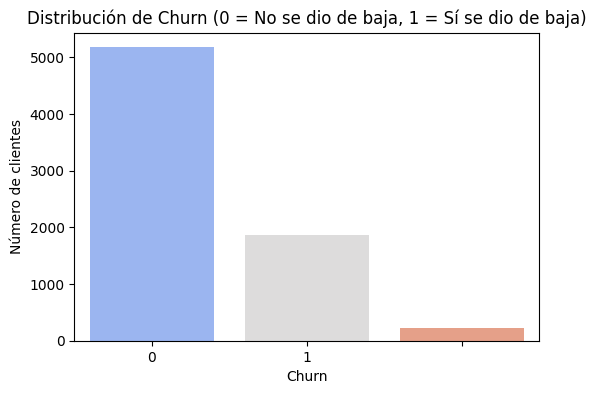

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Conteo
churn_counts = df['Churn'].value_counts()

# Gr√°fico
plt.figure(figsize=(6,4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="coolwarm")

plt.title("Distribuci√≥n de Churn (0 = No se dio de baja, 1 = S√≠ se dio de baja)")
plt.xlabel("Churn")
plt.ylabel("N√∫mero de clientes")
plt.show()


### Recuento de Evasi√≥n

üìå Columnas categ√≥ricas encontradas: ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']


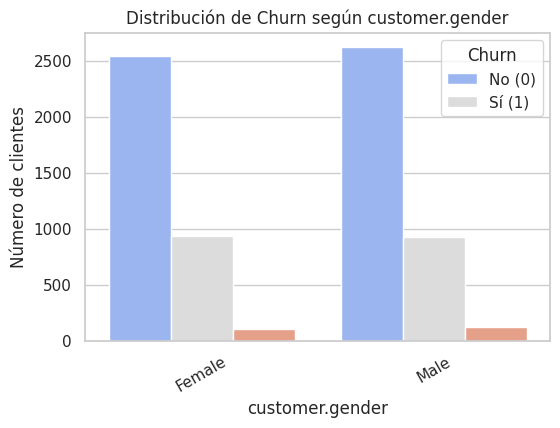

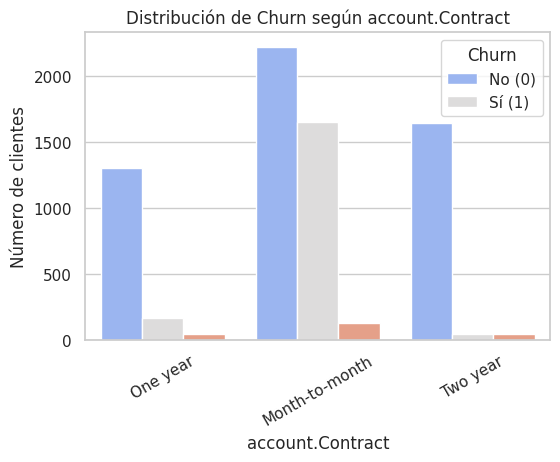

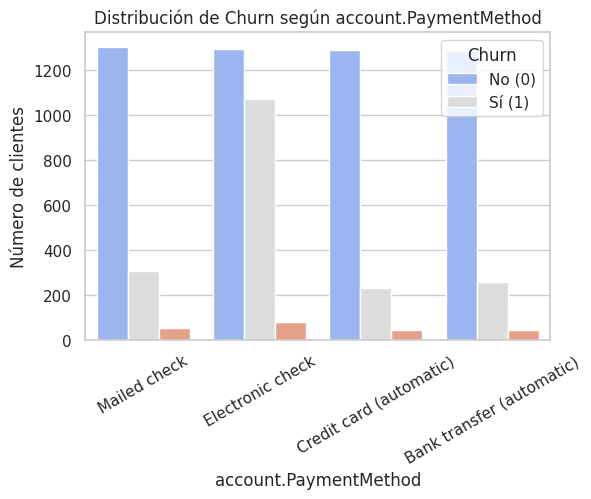

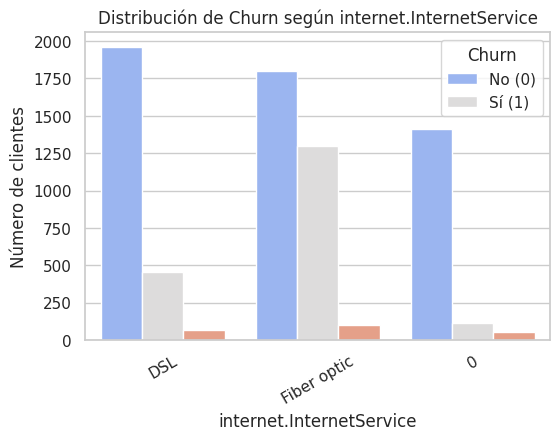


üìå Proporci√≥n de Churn por customer.gender:
Churn                0      1      
customer.gender                    
Female           70.96  26.14  2.90
Male             71.43  25.31  3.27

üìå Proporci√≥n de Churn por account.Contract:
Churn                 0      1      
account.Contract                    
Month-to-month    55.43  41.32  3.25
One year          86.04  10.93  3.03
Two year          94.49   2.75  2.75

üìå Proporci√≥n de Churn por account.PaymentMethod:
Churn                          0      1      
account.PaymentMethod                        
Bank transfer (automatic)  80.93  16.24  2.83
Credit card (automatic)    82.27  14.80  2.93
Electronic check           52.92  43.80  3.27
Mailed check               78.32  18.50  3.18

üìå Proporci√≥n de Churn por internet.InternetService:
Churn                         0      1      
internet.InternetService                    
0                         89.37   7.15  3.48
DSL                       78.86  18.45  2.69
Fiber o

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categoricas = ['customer.gender', 'account.Contract', 'account.PaymentMethod', 'internet.InternetService']

categoricas = [col for col in categoricas if col in df.columns]
print("üìå Columnas categ√≥ricas encontradas:", categoricas)

# ========= Gr√°ficos de distribuci√≥n de Churn por variable =========
sns.set(style="whitegrid")

for col in categoricas:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue="Churn", palette="coolwarm")
    plt.title(f"Distribuci√≥n de Churn seg√∫n {col}")
    plt.xlabel(col)
    plt.ylabel("N√∫mero de clientes")
    plt.xticks(rotation=30)
    plt.legend(title="Churn", labels=["No (0)", "S√≠ (1)"])
    plt.show()

# ========= 3) Tablas de proporciones de churn =========
for col in categoricas:
    print(f"\nüìå Proporci√≥n de Churn por {col}:")
    tabla = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(tabla.round(2))

### Conteo de Evasi√≥n

üìå Analizando estas columnas: ['customer.tenure']


/tmp/ipython-input-1365296975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")


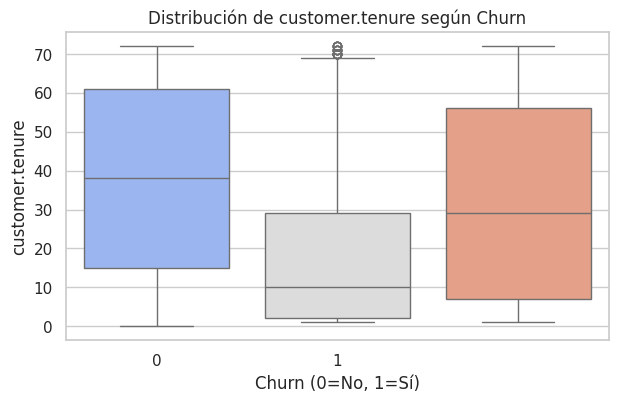

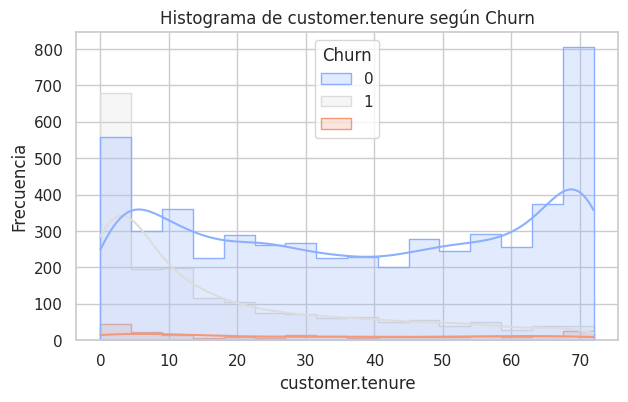

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Variables de inter√©s =========
numericas = ['customer.tenure', 'TotalCharges']  # Ajusta 'TotalCharges' si tu columna se llama distinto

# Filtrar solo las que existan en el DataFrame
numericas = [col for col in numericas if col in df.columns]
print("üìå Analizando estas columnas:", numericas)

sns.set(style="whitegrid")

for col in numericas:
    # Boxplot
    plt.figure(figsize=(7,4))
    sns.boxplot(data=df, x="Churn", y=col, palette="coolwarm")
    plt.title(f"Distribuci√≥n de {col} seg√∫n Churn")
    plt.xlabel("Churn (0=No, 1=S√≠)")
    plt.ylabel(col)
    plt.show()

    # Histograma
    plt.figure(figsize=(7,4))
    sns.histplot(data=df, x=col, hue="Churn", element="step", kde=True, palette="coolwarm")
    plt.title(f"Histograma de {col} seg√∫n Churn")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

## INFORME

### INTRODUCCI√ìN

El objetivo de este an√°lisis es entender y reducir la evasi√≥n de clientes (Churn) en TelecomX LATAM. Exploramos el comportamiento de los clientes, la relaci√≥n entre variables de contrato/pago/servicios y la probabilidad de cancelaci√≥n, para proponer acciones t√°cticas y estrat√©gicas que mejoren la retenci√≥n.

### LIMPIEZA DE DATOS

	‚Ä¢	Fuente: Archivo JSON estructurado por cliente (demograf√≠a, servicios y facturaci√≥n).
	‚Ä¢	Normalizaci√≥n: Se aplan√≥ la estructura anidada (p. ej., customer.*, internet.*, account.*).
	‚Ä¢	Etiquetas: Churn se convirti√≥ a binario (0 = permanece, 1 = cancela), eliminando registros sin etiqueta.
	‚Ä¢	Variables num√©ricas: Conversi√≥n a num√©rico de cargos mensuales y totales.
	‚Ä¢	Nueva m√©trica: Cuentas_Diarias = account.Charges.Monthly / 30 (promedio mensual de 30 d√≠as).
	‚Ä¢	Mapeos: Donde aplicaba, se transform√≥ Yes/No ‚Üí 1/0 en campos binarios.

### ANALISIS DATOS


	‚Ä¢	Registros analizados: 7267
	‚Ä¢	Tasa global de churn: ‚âà26%

#### ANALISIS DE DATOS - POR VARIABLE


	‚Ä¢	En account.Contract, la categor√≠a Month-to-month registra la tasa de churn m√°s alta.
	‚Ä¢	En account.PaymentMethod, ciertos m√©todos concentran mayor churn (ej. Electronic check).
	‚Ä¢	En internet.InternetService, clientes con Fiber optic muestran una tasa de churn superior frente a DSL.
	‚Ä¢	En customer.gender, no se observan grandes diferencias de churn entre hombres y mujeres.
	‚Ä¢	Tiempo de contrato (tenure): los clientes con menor tenure tienden a concentrar mayor churn; al aumentar la antig√ºedad, la probabilidad de cancelaci√≥n disminuye.
	‚Ä¢	Total gastado: se observan diferencias de distribuci√≥n entre grupos (Churn=0 vs Churn=1); valores extremos pueden asociarse a perfiles espec√≠ficos.

### CONCLUSIONES

	‚Ä¢	El churn global ronda un cuarto de la base de clientes.
	‚Ä¢	El tipo de contrato es un impulsor importante: clientes con contratos mensuales tienen mucha m√°s propensi√≥n a cancelar que los de 1 o 2 a√±os.
	‚Ä¢	El m√©todo de pago influye: algunos m√©todos presentan churn elevado, lo que sugiere riesgos asociados.
	‚Ä¢	El tipo de servicio de internet tambi√©n segmenta: Fiber optic muestra mayor churn que DSL.
	‚Ä¢	La antig√ºedad (tenure) es un fuerte predictor: los clientes recientes son m√°s propensos a cancelar.


### RECOMENDACIONES


	1.	Incentivos de permanencia: campa√±as para migrar clientes Month-to-month a contratos de 1‚Äì2 a√±os (bonos de instalaci√≥n, descuentos temporales).
	2.	Alertas tempranas: monitorear clientes de bajo tenure y contacto proactivo (onboarding reforzado, tutor√≠as de uso, check-ins).
	3.	Revisi√≥n de m√©todos de pago: ofrecer beneficios al migrar a alternativas con menor riesgo (ej. d√©bito autom√°tico).
	4.	Segmentaci√≥n por servicio de internet: planes personalizados para clientes con churn elevado (ajustes de precio/velocidad o bundles con valor agregado).
	5.	Programa de lealtad: recompensas por antig√ºedad y paquetes cruzados (m√≥vil + internet + TV) para aumentar el costo de oportunidad de cancelar.